<a href="https://colab.research.google.com/github/neel-p8/Approximate-Integrals-and-Derive-Pi/blob/main/Neel_Patel_1_Fall23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approximating hard integrals

**No np.trapz**

Each result is correct up to 5 decimal digits. $|res - correct| < 10^{-5}$.

Exact values are $\frac{5}{24}\pi^2$, $ \frac{e^e - e^{-e}}{2}$, $1$ and $1$.




In [ ]:
import numpy as np

def constant_function_of_one(x):
    '''Evaluates a constant function returning 1.
    It handles both a single number and np.array as input.

    Args:
      x: either a float or np.array of length n
    Returns:
      either a single 1. (as a float) or a length-n np.array of 1.
    '''

    # if input value is float, return 1 else if array return array of 1s
    if type(x) == float:
      return 0 * x + 1.
    elif type(x) == np.ndarray:
        return np.ones_like(x)

In [ ]:
def integrate(function_to_integrate, from_x, to_x, n):

  if type(function_to_integrate) == np.ufunc or type(function_to_integrate) != np.ndarray and type(function_to_integrate) != float:
    # create width of each sample
    delta_x = (to_x - from_x) / n

    # create n samples
    range = np.linspace(from_x, to_x, n + 1)

    # evaluate function at each sample
    y = function_to_integrate(range)

    # calculate using formula
    integral = delta_x * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5*y[-1])

  return integral
  '''
  Following trapezoidal rule, delta x returns the width of each sample. range
  returns n amount of samples. y is the function value at each sample. the
  integral variable returns the trapezoidal rule formula
  '''

# Timing


Run 'integrate' function with $\cosh$ using $n = 10^7$ samples. Should take around $0.25s = 250ms$.

In [ ]:
%%timeit
# the line above will time your code

# your function call goes here
integrate(np.cosh, 0, np.exp(1), 10**7)

199 ms ± 35.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Tests


In [ ]:
def close_enough(a, b, num_digits):
  return np.abs(a-b) < 10**-num_digits

# example test checking if res=1.000005 is a good enough approximation
# for the correct result (1). In our case we check if the initial 5
# digits of the decimal expansion match.
res = 1.000003
assert close_enough(1, res, num_digits = 5) # this 'test' passes

# first function
def my_function(x):
  var = np.arccos(np.cos(x) / (1 + 2 * np.cos(x)))
  return var

# tests if first function is correct up to 5 decimal places. Needs 144 samples to fall within boundaries
assert close_enough(integrate(my_function, 0, np.pi / 2, 144), ((5 / 24) * np.pi **2), 5)

# tests if second function is correct up to 5 decimal places. Needs 682 samples to fall within boundaries
assert close_enough(integrate(np.cosh, 0, np.exp(1), 682), ((np.exp(1)**np.exp(1) - np.exp(1)** -np.exp(1)) / 2), 5)

# tests if third function is correct up to 5 decimal places. Needs 146 samples to fall within boundaries
assert close_enough(integrate(lambda x: 1/x, 1, np.exp(1), 146), 1, 5)

# tests if last function is correct up to 5 decimal places.
assert close_enough(integrate(constant_function_of_one, 0, 1, 3), 1, 5)


# The value of $\pi$

Draw $n=1000$ from the unit square $[0,1]\times[0,1]$. Plot points which are inside the Euclidean unit ball in green, and the points outside in red.

## Implementation

In a **single experiment** you draw a total of $n$ points. **Repeat experiment 10 times** using the same value of $n$.

Value $n$ with approximation $3.141$...  (>= 50% of the time)

> Keep track of the approximation from $i$ initial points in the experiment -- **for each** $i$ between $1$ and $n$.

## Visualization

For each of the 10 experiments, plot approximation of how $\pi$ changed at each $k$ between $1$ to $n$.

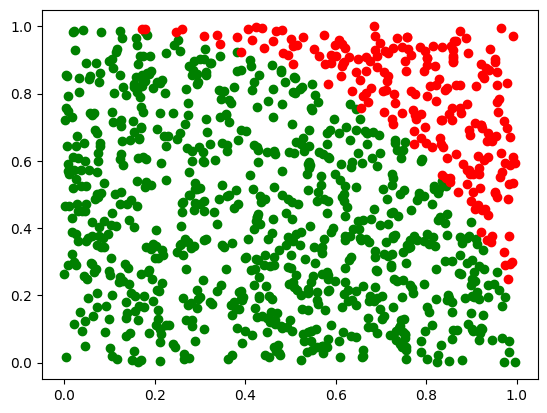

The value of n for which I get the approximation 3.141 is 301207.


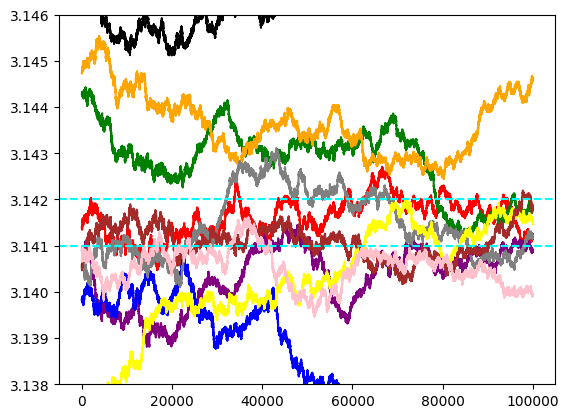

In [ ]:
# part 0
import matplotlib.pyplot as plt

# plot 1000 random points. Check if inside or outside circle, plot green/red
P = np.random.rand(1000,2)
norms = np.linalg.norm(P, axis = 1)
inside = P[norms <= 1]
outside = P[norms > 1]

plt.scatter(inside[:, 0], inside[:, 1], color = "green")
plt.scatter(outside[:, 0], outside[:, 1], color = "red")

plt.show()

# part 1

# control while loop
loop = True
n = 300000
final_n = 0

# record successes of close approximation
count = 0

while loop:

    # calculate distance from inside circle
    P2 = np.random.rand(n,2)
    norms2 = np.linalg.norm(P2, axis = 1)

    # record number of points inside circle
    inside2 = np.sum(norms2 <= 1)

    # approximate pi using formula and if within 0.001, count as success
    approximation = 4 * inside2 / n
    if approximation <= 3.142 and approximation >= 3.141:
      loop = False
      final_n = n
      trials_test = np.empty((10, final_n))

      # test n value with 10 experiments
      for i in range(10):
        P_test = np.random.rand(final_n, 2)
        norms_test = np.linalg.norm(P_test, axis = 1)

        # record number of points inside circle
        inside_test2 = np.cumsum(norms_test <= 1)

        # Approximate pi for all 'n' values at once
        trials_test[i] = 4 * inside_test2 / np.arange(1, final_n + 1)

        # approximate pi using formula and if between 3.141 and 3.142, count as success
        if trials_test[i][final_n - 1] <= 3.142 and trials_test[i][final_n - 1] >= 3.141:
            count += 1

        # if 50% of trials successful, and 10 trials run, break out of while loop
        if count >= 5 and i == 9:
            loop = False
        elif i == 9 and count < 5:
            trials_test = np.empty((10, final_n))
            loop = True
            count = 0
    n += 1

print(f"The value of n for which I get the approximation 3.141 is {final_n}.")

# Part 2
plt.plot(trials_test[0][-100000:], color = 'red')
plt.plot(trials_test[1][-100000:], color = 'purple')
plt.plot(trials_test[2][-100000:], color = 'blue')
plt.plot(trials_test[3][-100000:], color = 'green')
plt.plot(trials_test[4][-100000:], color = 'orange')
plt.plot(trials_test[5][-100000:], color = 'grey')
plt.plot(trials_test[6][-100000:], color = 'yellow')
plt.plot(trials_test[7][-100000:], color = 'brown')
plt.plot(trials_test[8][-100000:], color = 'pink')
plt.plot(trials_test[9][-100000:], color = 'black')
plt.axhline(y=3.141, color='cyan', linestyle='--')
plt.axhline(y=3.142, color='cyan', linestyle='--')

plt.ylim(3.138, 3.146)
plt.show()
